In [1]:
!nvidia-smi

Mon Jul 10 12:05:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-700f7032-48d4-a5ee-8f4b-e9245fbdad11)


In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [4]:
!benchmark.sh

/bin/bash: benchmark.sh: command not found


In [6]:
from google.colab import files


uploaded = files.upload()


Saving PlantVillage.zip to PlantVillage.zip


In [16]:
!python3 -m pip install matplotlib

In [18]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [69]:
IMAGE_SIZE=255
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [22]:
import os
os.getcwd()

'/content'

In [25]:
os.listdir("/content")

['.config', 'PlantVillage.zip', 'PlantVillage', 'sample_data']

In [ ]:
!unzip "PlantVillage.zip"

In [27]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [63]:
class_names=dataset.class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [30]:
import matplotlib.pyplot as plt


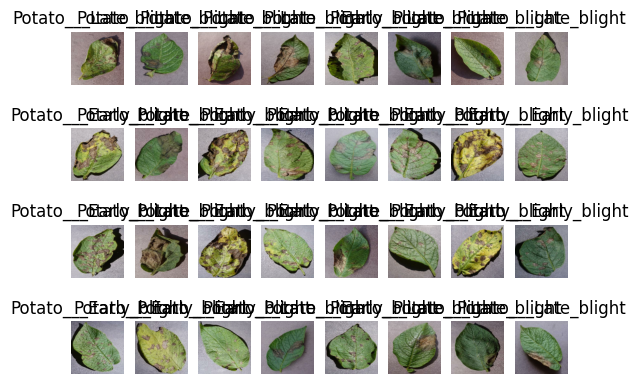

In [68]:
for im_batch,label_batch in dataset.take(1):
  for i in range(32):
    ax=plt.subplot(4,8,i+1)
    plt.imshow(im_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])

In [71]:
train_size=.8
len(dataset)*train_size

54.400000000000006

In [72]:
train_ds=dataset.take(54)
len(train_ds)

54

In [73]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [74]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [134]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [135]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [136]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(.2),

])

In [170]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
     layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),


    layers.Flatten(),
    layers.Dense(256,activation="relu"),
     layers.Dense(64,activation="relu"),
     layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(3,activation="softmax")
])

In [171]:
model.build(input_shape=input_shape)

In [172]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f219557e110>>

In [162]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [163]:
model.fit(train_ds,epochs=50,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 9s 65ms/step - loss: 0.9211 - accuracy: 0.4763 - val_loss: 0.7993 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 3s 60ms/step - loss: 0.8422 - accuracy: 0.5399 - val_loss: 0.7090 - val_accuracy: 0.6615
Epoch 3/50
54/54 [==============================] - 3s 63ms/step - loss: 0.7332 - accuracy: 0.6678 - val_loss: 0.5601 - val_accuracy: 0.7604
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.6516 - accuracy: 0.7280 - val_loss: 0.8455 - val_accuracy: 0.5729
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.5539 - accuracy: 0.7610 - val_loss: 0.5520 - val_accuracy: 0.7500
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.4284 - accuracy: 0.8194 - val_loss: 0.3239 - val_accuracy: 0.8802
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.4005 - accuracy: 0.8293 - val_loss: 0.4224 - val_accuracy: 0.8073
Epoch 8/50
54

In [164]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 29ms/step - loss: 0.0178 - accuracy: 0.9914


[0.01784135401248932, 0.9913793206214905]

In [99]:
model.save(f"/content/{2}")

In [103]:
os.listdir(os.getcwd())

['variables',
 'fingerprint.pb',
 'keras_metadata.pb',
 'assets',
 'saved_model.pb']

In [173]:
os.chdir("/content")

In [224]:

from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense ,ReLU,Softmax
from keras.models import Sequential
def build_model(hp):
  model = Sequential()

  model.add(Conv2D(hp.Int('input_units',
                                  min_value=32,
                                  max_value=256,
                                  step=32), (3, 3), input_shape=input_shape))

  model.add(ReLU())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
    model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                  min_value=32,
                                  max_value=256,
                                  step=32), (3, 3)))
  model.add(ReLU())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  for i in range(hp.Int('n_connections', 1, 4)):
    model.add(Dense(hp.Choice(f'n_nodes',
                                    values=[128, 256, 512, 1024])))
  model.add(ReLU())
  model.add(Dense(10))
  model.add(Softmax())

  model.compile(optimizer="adam",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

  return model

In [225]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(hypermodel=build_model,objective="val_accuracy",
    max_trials=5,  # how many model variations to test?
    directory='./CIFAR1_PROJECT',
    project_name='KerasTuner')

In [227]:
xa=[]
ya=[]
for x, y in train_ds:
  xa.append(x)
  ya.append(y)

In [228]:
xt=[]
yt=[]
for x, y in val_ds:
  xt.append(x)
  yt.append(y)